<a href="https://colab.research.google.com/github/InbarFabian/AppliedFinal/blob/main/AppliedFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Statistics

# Crimes Against Women

The first data selected is about crimes against women in India.

The data contains 736 samples, each contains the name of a state in india, the year, and the number of cases of different kinds of crimes.

In [1]:
# Importing libraries:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Uploading the data:

# connecting the drive (not mandatory)
from google.colab import drive
drive.mount('/content/drive')

# uploading the csv
df_crimes = pd.read_csv('/content/drive/MyDrive/CrimesOnWomenData.csv')

df_crimes = df_crimes.drop(columns=['Unnamed: 0'])
df_crimes.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,ASSAM,2001,817,1070,59,850,4,1248,0
3,BIHAR,2001,888,518,859,562,21,1558,83
4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


* Rape: rape cases
* K&A: Kidnapping and Abduction cases
* DD: Dowry Deaths
* AoW: Assault against Women
* AoM: Assault against Modesty of Women
* DV: Domestic Violence
* WT: Women Trafficking

## Visualization

In [2]:
# First, lets look at the describe function of the dataset:
df_crimes.describe()

,Year,Rape,K&A,DD,AoW,AoM,DV,WT
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,2011.149457,727.855978,1134.542120,215.692935,1579.115489,332.722826,2595.078804,28.744565
std,6.053453,977.024945,1993.536828,424.927334,2463.962518,806.024551,4042.004953,79.999660
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,35.000000,24.750000,1.000000,34.000000,3.000000,13.000000,0.000000
50%,2011.000000,348.500000,290.000000,29.000000,387.500000,31.000000,678.500000,0.000000
75%,2016.000000,1069.000000,1216.000000,259.000000,2122.250000,277.500000,3545.000000,15.000000
max,2021.000000,6337.000000,15381.000000,2524.000000,14853.000000,9422.000000,23278.000000,549.000000


To see how versetile our data, we will check how the years distributes.

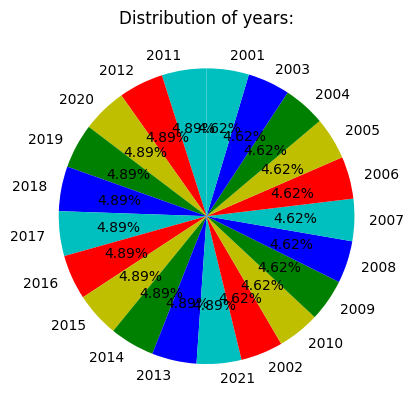

In [3]:
# Calculate the frequencies of target names
Year_counts = df_crimes['Year'].value_counts()

# Prepare data for the pie chart
labels = Year_counts.index.to_list()
sections = Year_counts.to_numpy()
colors = ['c', 'r', 'y','g','b']

# Create a pie chart
plt.pie(sections, labels=labels, colors = colors, startangle=90, autopct='%1.2f%%')

# Add title and show the pie chart
plt.title('Distribution of years:')
plt.show()

In [4]:
# Check for missing values
missing_values = df_crimes.isnull().sum()
print(missing_values)

# Check for duplicate rows
duplicate_rows = df_crimes[df_crimes.duplicated(keep=False)]
print(duplicate_rows)

State    0
Year     0
Rape     0
K&A      0
DD       0
AoW      0
AoM      0
DV       0
WT       0
dtype: int64
Empty DataFrame
Columns: [State, Year, Rape, K&A, DD, AoW, AoM, DV, WT]
Index: []


We can see there are no "Null" values or duplicated rows.

To see the boxplots better, we will adress 7 years at a time instead of every year individually.

In [5]:
def group_years(year):
    if 2001 <= year <= 2007:
        return '2001-2007'
    elif 2008 <= year <= 2014:
        return '2008-2014'
    elif 2015 <= year <= 2021:
        return '2015-2021'

df_crimes['Year_group'] = df_crimes['Year'].apply(group_years)

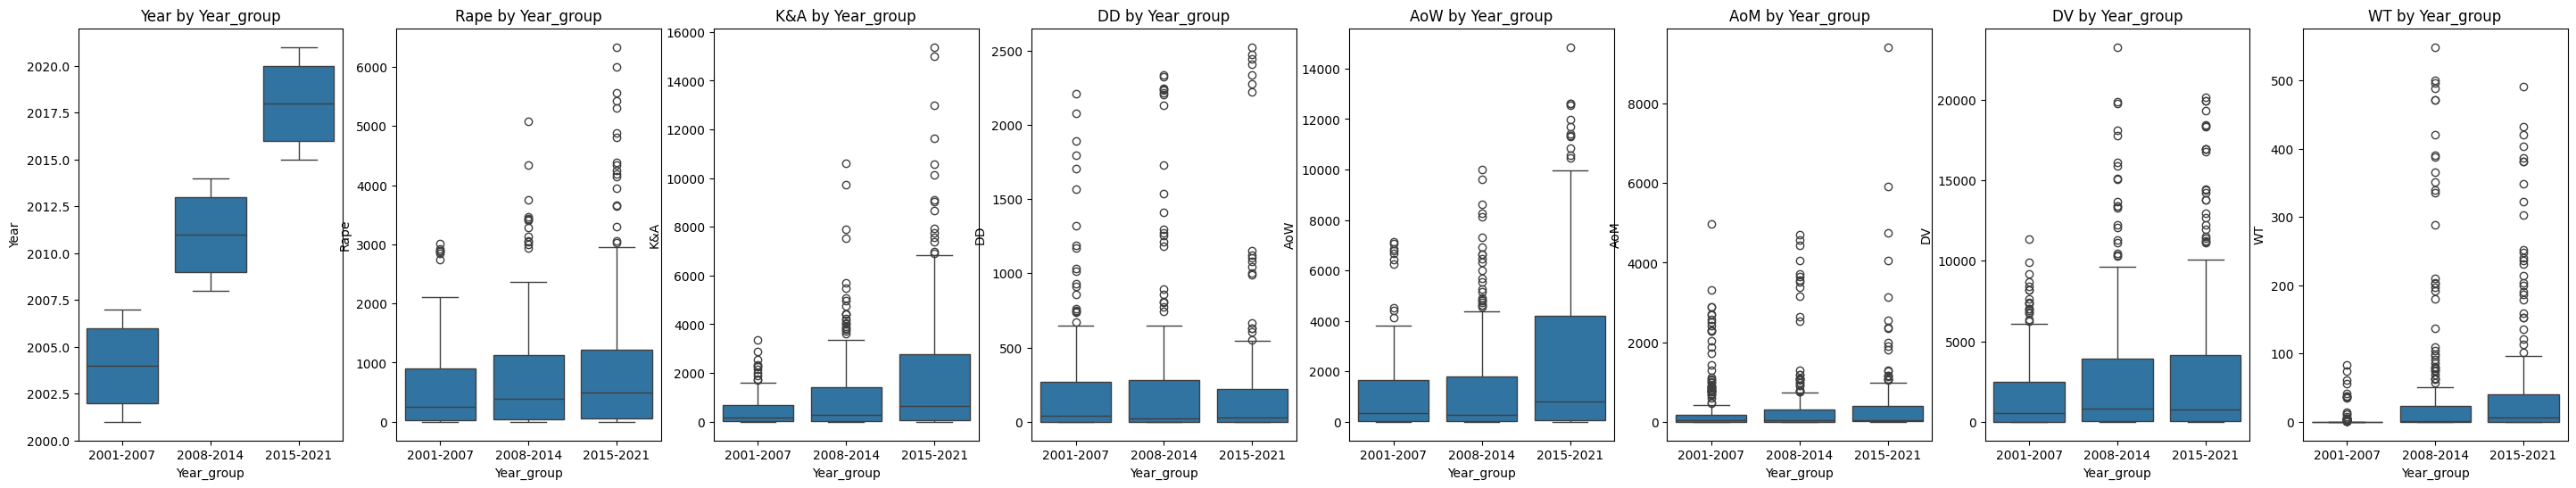

In [6]:
# Boxplots of the data
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(df_crimes.select_dtypes(include=['int64', 'float64']).columns), figsize=(36, 6))

# Iterate through each numerical column
for i, column in enumerate(df_crimes.select_dtypes(include=['int64', 'float64']).columns):
    # Create a boxplot for each Year_group value
    sns.boxplot(x="Year_group", y=column, data=df_crimes, ax=axes[i])
    axes[i].set_title(f"{column} by Year_group")

# Show the plot
plt.show()

In [7]:
# Detect and remove outliers:
# Calculate the z-score for each numerical column
z_scores = df_crimes.select_dtypes(include=['int64', 'float64']).apply(lambda x: (x - x.mean()) / x.std())

# Define a threshold for outlier detection
threshold = 2

# Find the indices of outlier rows
outlier_indices = (z_scores > threshold).any(axis=1)

# Filter out the rows that are not outliers
df_crimes_cleaned = df_crimes[~outlier_indices]

# Verify the outliers were removed
print(f"Cleaned dataset shape: {df_crimes_cleaned.shape}")

Cleaned dataset shape: (585, 10)


In [8]:
df_crimes = df_crimes_cleaned

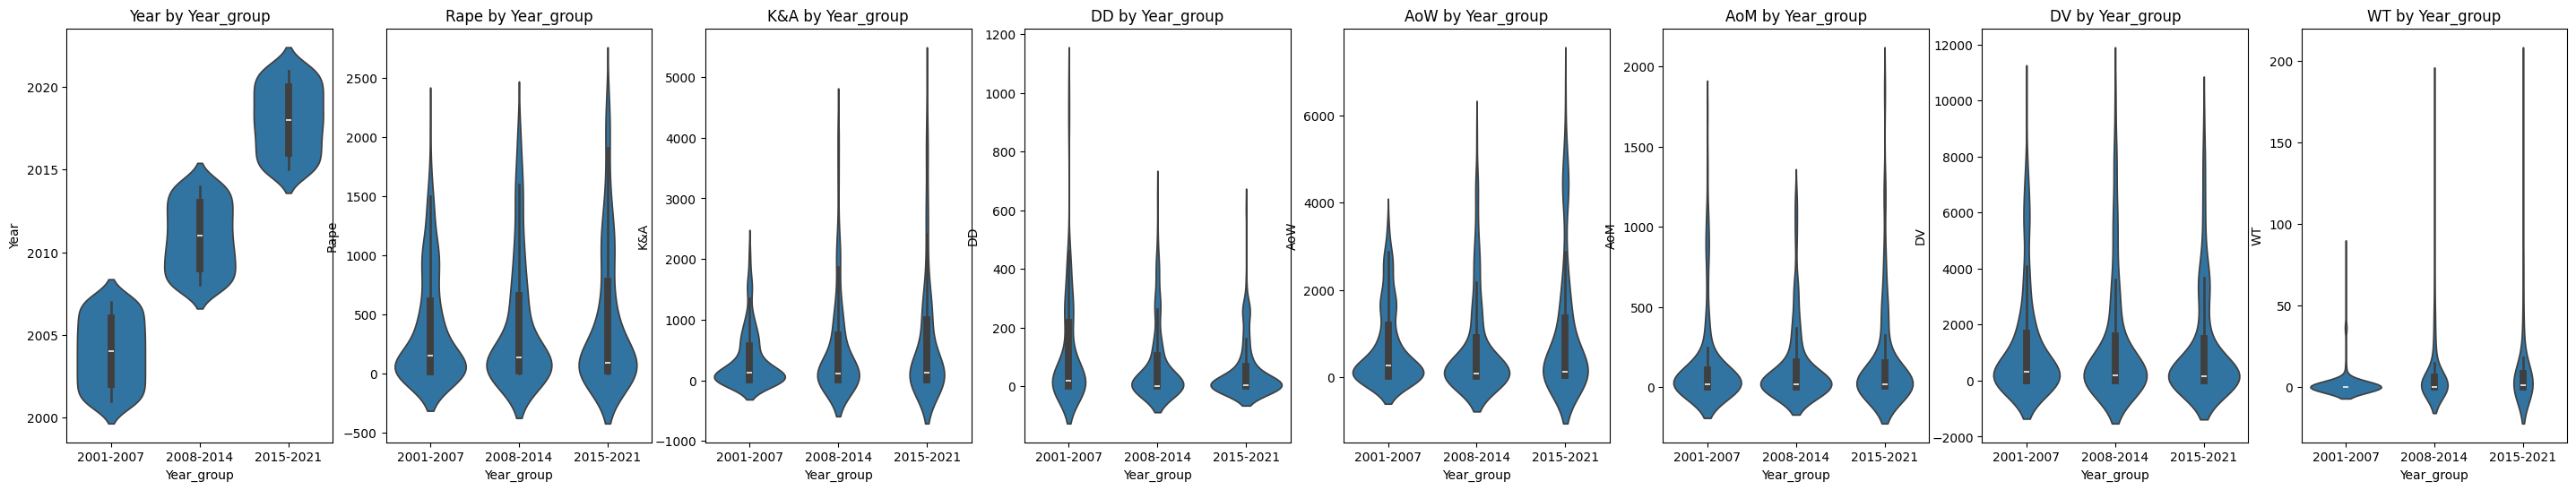

In [9]:
# Violinplots of the data
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(df_crimes.select_dtypes(include=['int64', 'float64']).columns), figsize=(36, 6))

# Iterate through each numerical column
for i, column in enumerate(df_crimes.select_dtypes(include=['int64', 'float64']).columns):
    # Create a violinplot for each Year_group value
    sns.violinplot(x="Year_group", y=column, data=df_crimes, ax=axes[i])
    axes[i].set_title(f"{column} by Year_group")

# Show the plot
plt.show()

As we can see, most of the plots looks like they are not distributes normally.

We can also see there is no significant difference between the years. To check this formaly, we will do an 'anova' test:

In [10]:
from sklearn.feature_selection import f_classif

X = df_crimes.drop(columns=['Year_group', 'State', 'Year'])
y = df_crimes['Year_group']

# Perform ANOVA F-test for each feature
f_values, p_values = f_classif(X, y)

# Create a DataFrame to store the results
anova_results = pd.DataFrame({'feature': X.columns,'f_value': f_values,'p_value': p_values})

# Sort the DataFrame by p-value
anova_results = anova_results.sort_values(by='p_value', ascending=True)

# Print the results
print(anova_results)

  feature    f_value   p_value
6      WT  11.759221  0.000010
2      DD  11.131160  0.000018
1     K&A   7.415397  0.000661
3     AoW   4.451643  0.012059
0    Rape   0.944579  0.389438
4     AoM   0.552027  0.576083
5      DV   0.259074  0.771855


We can see that three plots are with a sufficient p-value to be distributed normally: K&A, AoW, WT.

Let's try to see how different states affect crimes against women.

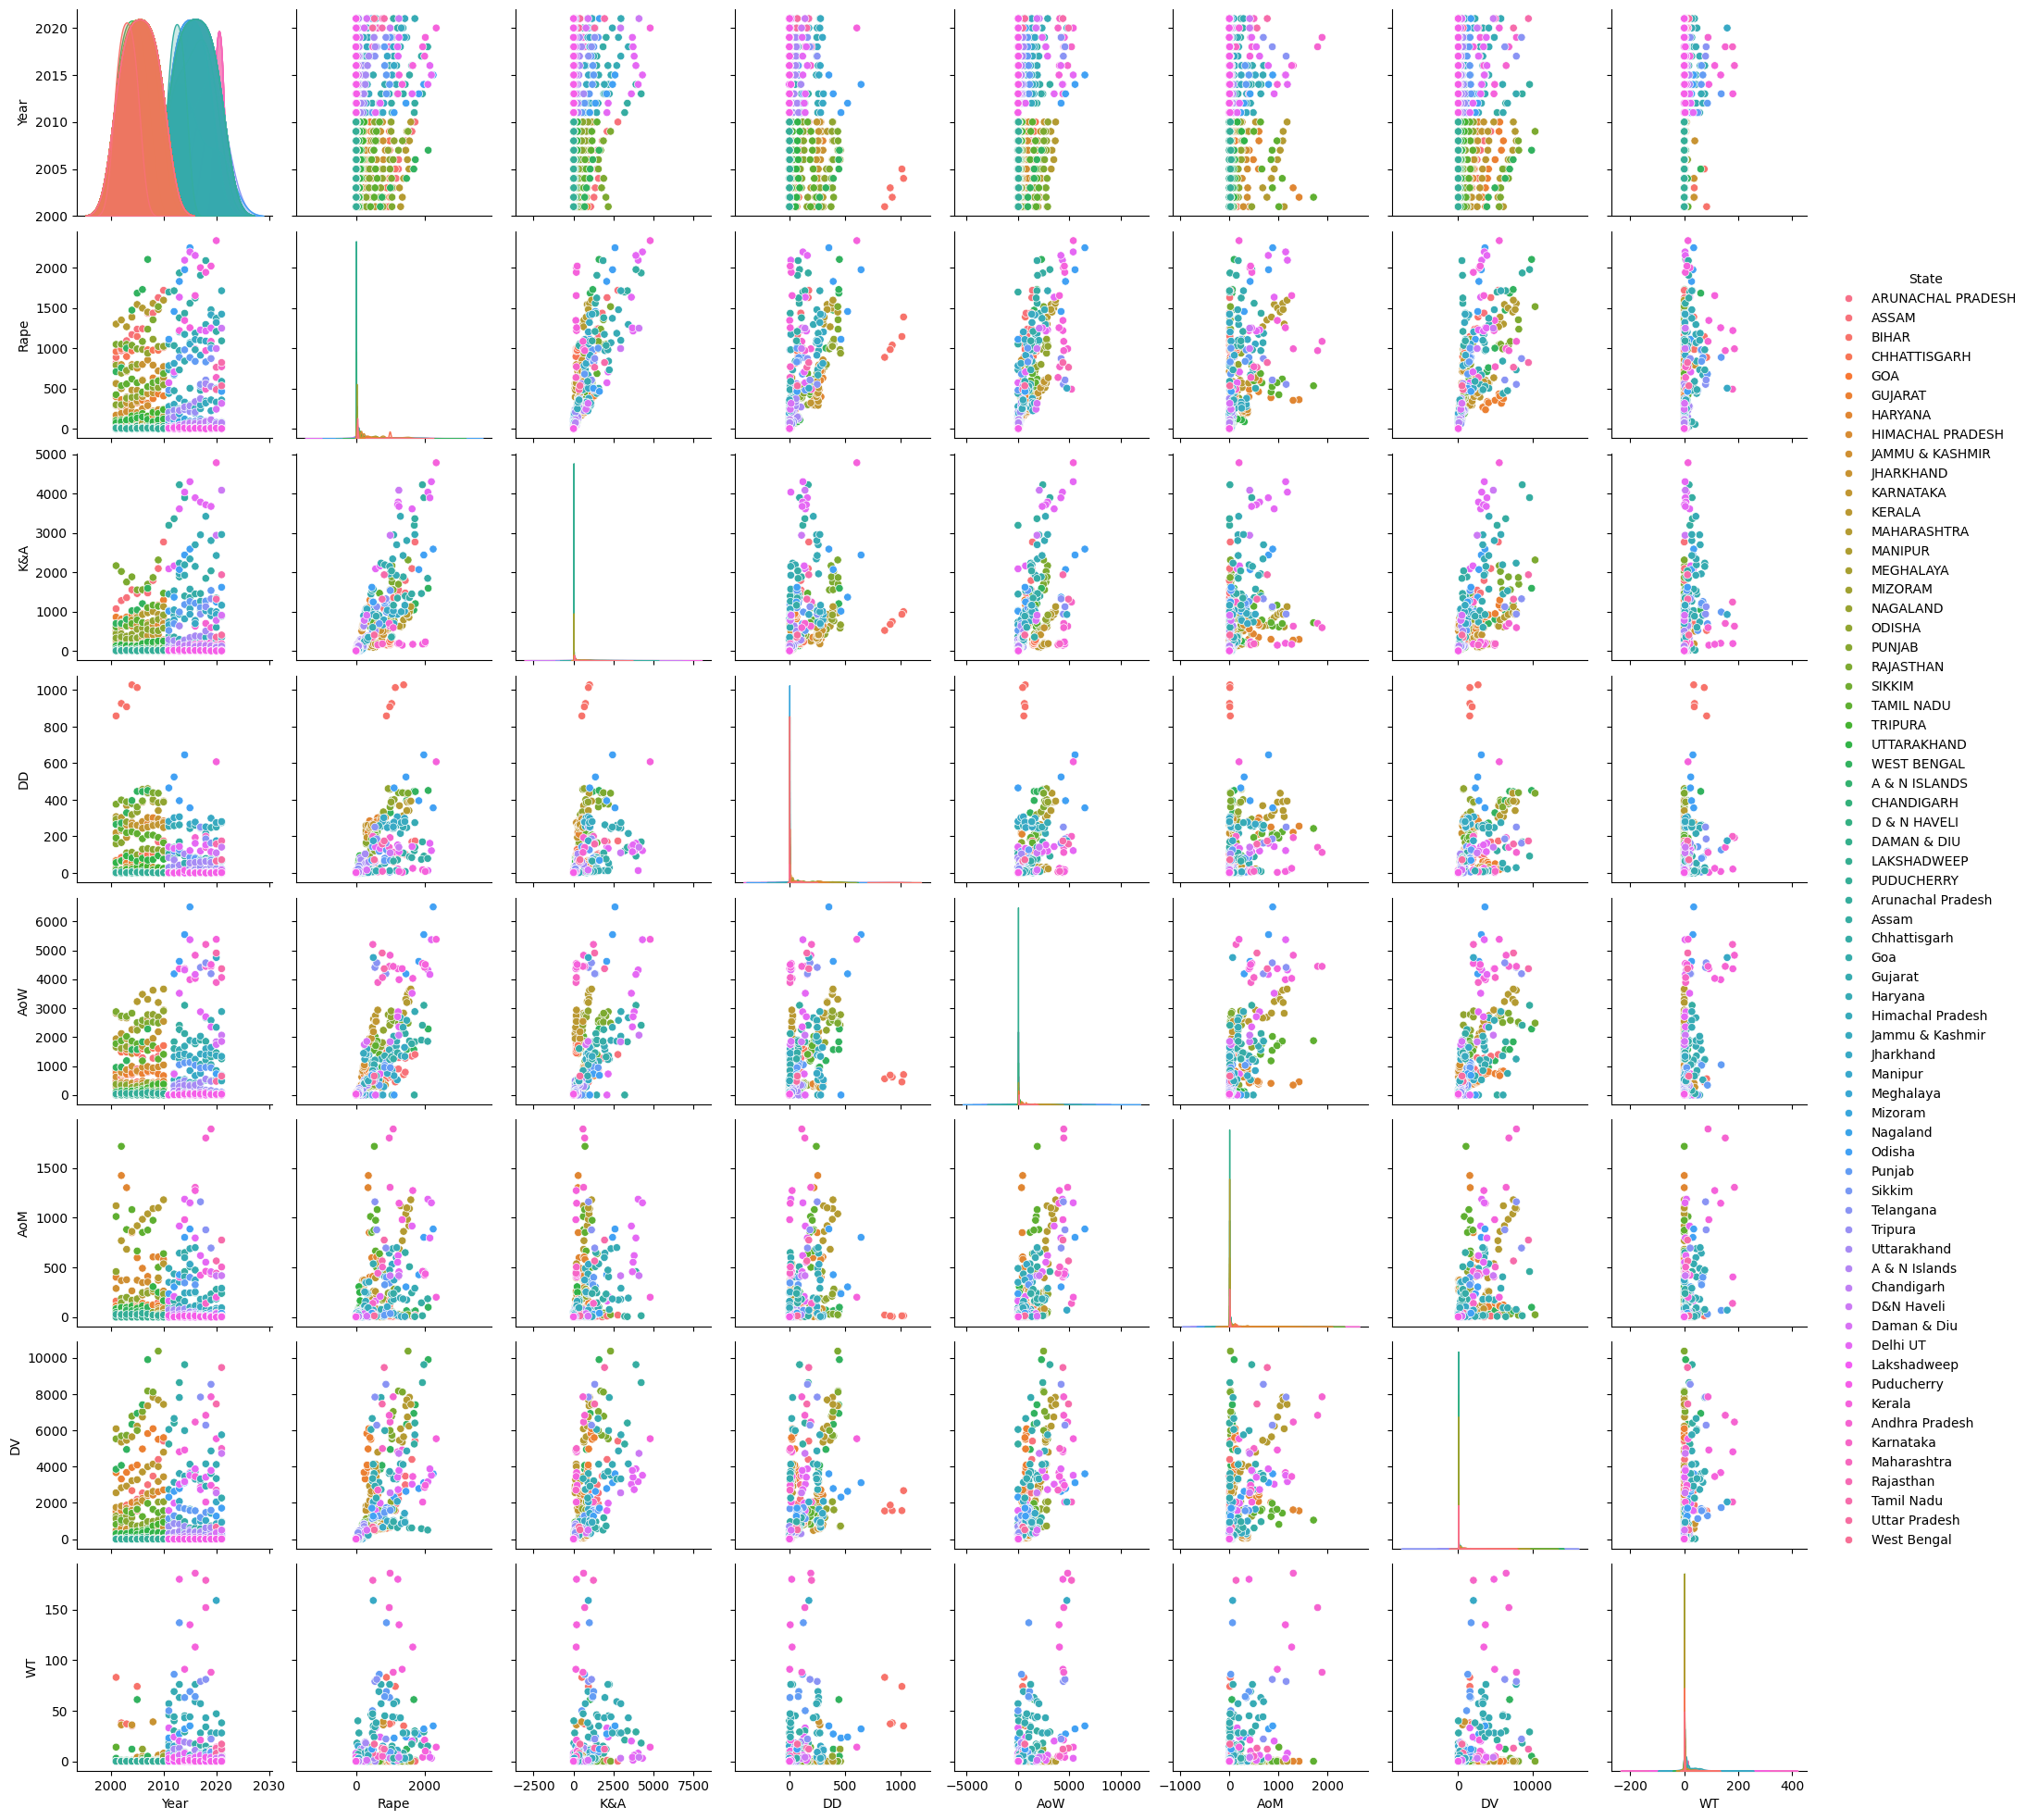

In [11]:
import matplotlib.pyplot as plt
sns.pairplot(df_crimes, hue="State")
plt.show()

As we can see, we have to many parameters to see anything in the pairplot. therefore, we will try using PCA to reduce dimensions.

In [12]:
from sklearn.decomposition import PCA

# Create a PCA instance with the desired number of components
pca = PCA(n_components=3)

# Fit the PCA instance to the data
pca.fit(X)

# Transform the data using the fitted PCA instance
X_reduced = pca.transform(X)

# Print the shape of the reduced data
print(X_reduced.shape)

(585, 3)


[0.84017314 0.09183854 0.04987859]
[0.84017314 0.93201168 0.98189027]


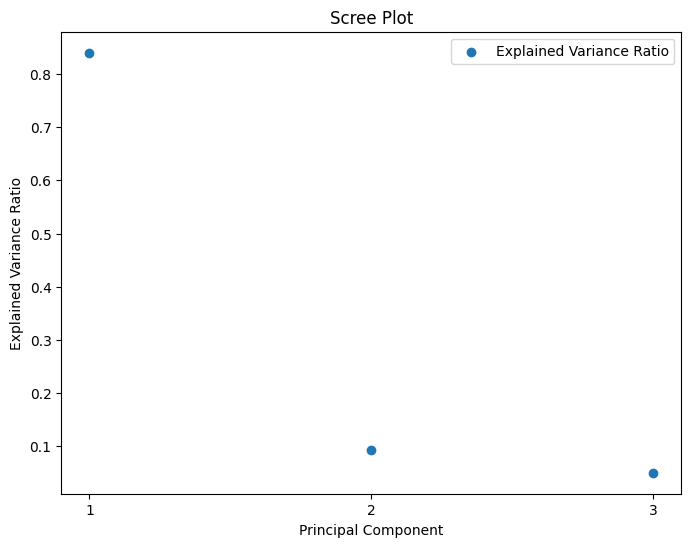

In [13]:
# Calculate the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio
print(explained_variance_ratio)

# Calculate the cumulative sum of the explained variance ratio
cumulative_explained_variance_ratio = explained_variance_ratio.cumsum()

# Print the cumulative explained variance ratio
print(cumulative_explained_variance_ratio)

# Create a scree plot to visualize the explained variance ratio for each principal component
plt.figure(figsize=(8, 6))
plt.scatter(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, label='Explained Variance Ratio')

# Explicitly set natural numbers on the x-axis
plt.xticks(range(1, len(explained_variance_ratio) + 1))

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.show()

Now we will present the PCA

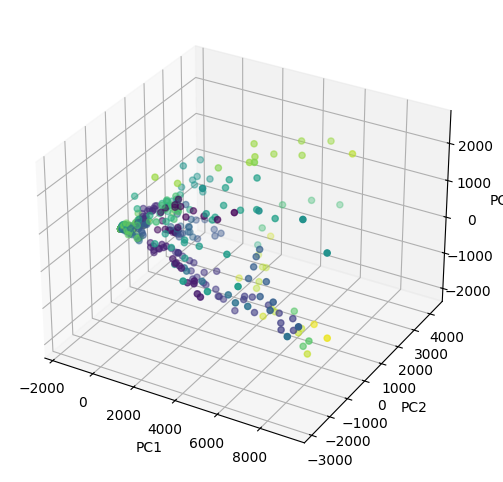

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

State = df_crimes['State'].unique()
color_map = {name: idx for idx, name in enumerate(State)}
colors = [color_map[name] for name in df_crimes['State']]
# Scatter plot of the PCA results, colored by the State feature
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=colors, cmap='viridis')

# Set the labels for the axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Show the plot
plt.show()

In [15]:
from plotly.express import scatter_3d

# Create a 3D scatter plot with interactive features
fig = scatter_3d(X_reduced, x=0, y=1, z=2, color=df_crimes['State'], opacity=0.8)

# Update the layout to show the scene
fig.update_layout(scene=dict(
    xaxis_title='PC1',
    yaxis_title='PC2',
    zaxis_title='PC3'
))

# Show the plot
fig.show()

Coloring the new plot by states gives us zero value. Let's try using clustering to see if the data can be seperated using things we haven't used yet.

               State  Year  Rape   K&A   DD   AoW  AoM    DV  WT Year_group  \
1  ARUNACHAL PRADESH  2001    33    55    0    78    3    11   0  2001-2007   
2              ASSAM  2001   817  1070   59   850    4  1248   0  2001-2007   
3              BIHAR  2001   888   518  859   562   21  1558  83  2001-2007   
4       CHHATTISGARH  2001   959   171   70  1763  161   840   0  2001-2007   
5                GOA  2001    12     6    2    17    7    11   0  2001-2007   

   cluster  
1        2  
2        0  
3        0  
4        0  
5        2  


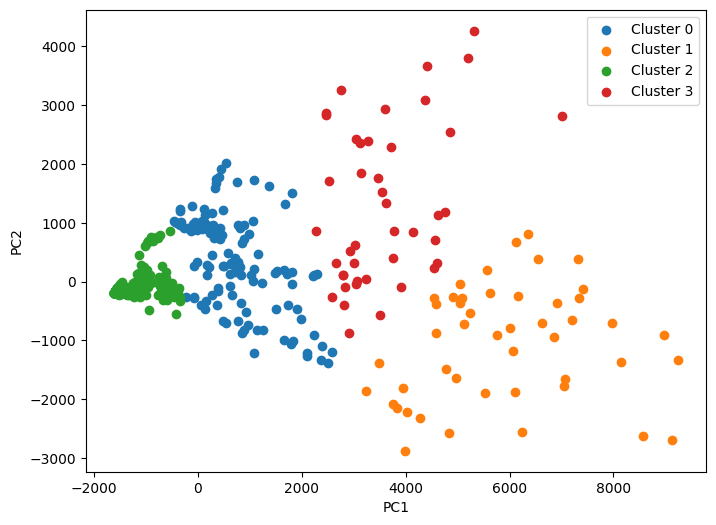

In [16]:
from sklearn.cluster import KMeans

# Define the number of clusters
num_clusters = 4

# Create a KMeans instance
kmeans = KMeans(n_clusters=num_clusters)

# Fit the KMeans instance to the data
kmeans.fit(X_reduced)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df_crimes['cluster'] = cluster_labels

# Print the DataFrame
print(df_crimes.head())

# Create a scatter plot of the clusters
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(num_clusters):
    ax.scatter(X_reduced[cluster_labels == i, 0], X_reduced[cluster_labels == i, 1], label=f'Cluster {i}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()
plt.show()



Different way to do PCA:

(585, 2)


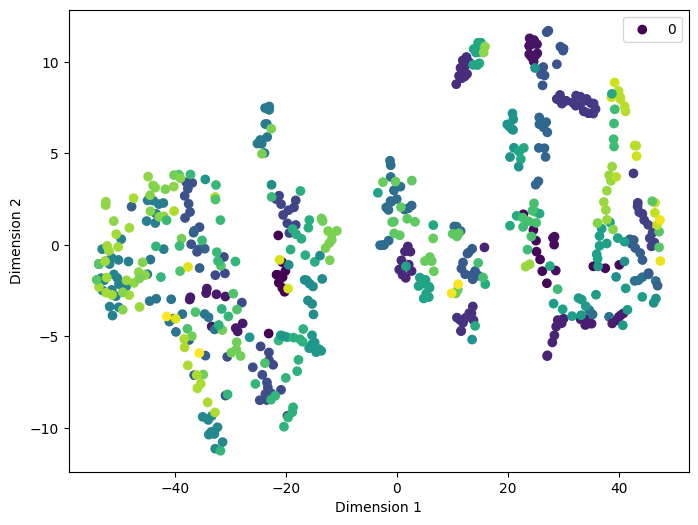

In [17]:
from sklearn.manifold import TSNE

# Create a TSNE instance with the desired number of components
tsne = TSNE(n_components=2)

# Fit the TSNE instance to the data
tsne.fit(X)

# Transform the data using the fitted TSNE instance
X_tsne = tsne.fit_transform(X)

# Print the shape of the reduced data
print(X_tsne.shape)

# Create a scatter plot of the TSNE results, colored by the State feature
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors, cmap='viridis')

# Set the labels for the axes
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(colors)

# Show the plot
plt.show()

We can see that even with TNSE we have trouble finding any seperation at all.
So from now on we will use a different dataset.

# Gym Members Exercise

In [18]:
# uploading the csv
df_gym = pd.read_csv('/content/drive/MyDrive/gym_members_exercise_tracking.csv')
df_gym.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [19]:
# making sure the numerical columns are actually numbers all the way.
df_gym.dtypes

,0
Age,int64
Gender,object
Weight (kg),float64
Height (m),float64
Max_BPM,int64
Avg_BPM,int64
Resting_BPM,int64
Session_Duration (hours),float64
Calories_Burned,float64
Workout_Type,object


In [20]:
# showing only high intensity workouts
high_intensity = df_gym[(df_gym['Calories_Burned'] > 700)]
high_intensity.shape


(756, 15)

In [21]:
high_intensity.tail()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
967,20,Male,55.0,1.60,172,168,67,1.12,1035.0,Yoga,24.0,3.2,4,2,21.48
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [22]:
# see what different type of workouts we have
print("Unique Workout Types:", df_gym['Workout_Type'].unique())

Unique Workout Types: ['Yoga' 'HIIT' 'Cardio' 'Strength']


In [23]:
# some basic statistics about the dataset
df_gym.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In this dataset, we will start to investigate the difference between workout types.

## Statistic tests

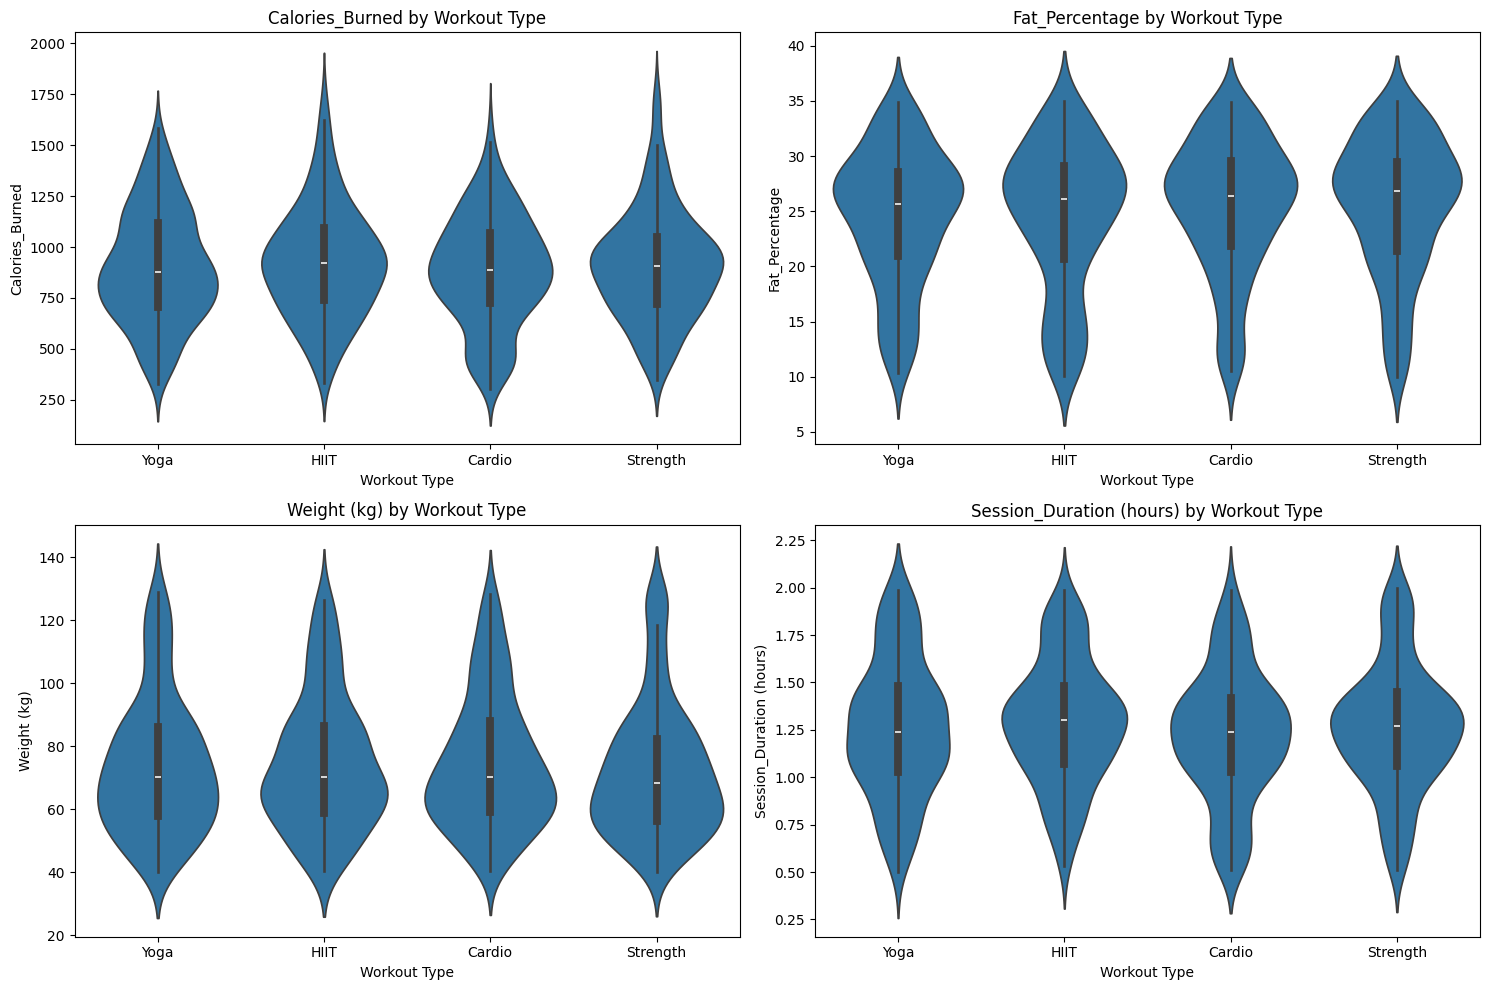

In [24]:
# violin-plot of clories burned, weight, fat percentage and workout duration based on the workout
features = ['Calories_Burned', 'Fat_Percentage', 'Weight (kg)', 'Session_Duration (hours)']

# Create a figure for the subplots
plt.figure(figsize=(15, 10))

# Violin plot for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
    sns.violinplot(x='Workout_Type', y=feature, data=df_gym)
    plt.title(f'{feature} by Workout Type')
    plt.xlabel('Workout Type')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

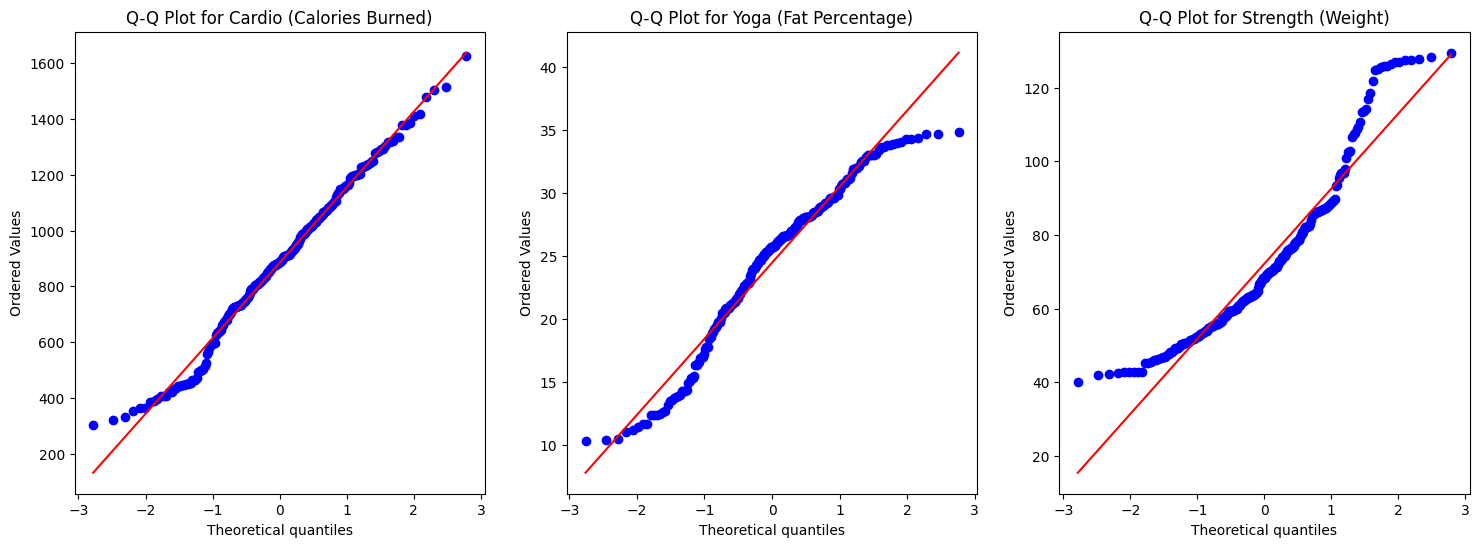

In [25]:
# Let's check how close some of them are to a normal disterbution:
cardio_calories = df_gym[df_gym['Workout_Type'] == 'Cardio']['Calories_Burned']
yoga_fat_percentage = df_gym[df_gym['Workout_Type'] == 'Yoga']['Fat_Percentage']
strength_weight = df_gym[df_gym['Workout_Type'] == 'Strength']['Weight (kg)']

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
stats.probplot(cardio_calories, dist="norm", plot=plt)
plt.title('Q-Q Plot for Cardio (Calories Burned)')

plt.subplot(1, 3, 2)
stats.probplot(yoga_fat_percentage, dist="norm", plot=plt)
plt.title('Q-Q Plot for Yoga (Fat Percentage)')

plt.subplot(1, 3, 3)
stats.probplot(strength_weight, dist="norm", plot=plt)
plt.title('Q-Q Plot for Strength (Weight)')

plt.show()

We can see that the plots does not distributes normally, therefore we can assume that the tests won't be completly accurate.

In [26]:
#Confidence Intervals for calories burned:
calories_burned = df_gym['Calories_Burned']
statistic = lambda x: x.mean()
res = stats.bootstrap([calories_burned], statistic, confidence_level=0.95, n_resamples=1000, method='percentile')

print(res.confidence_interval)

ConfidenceInterval(low=887.5408530318601, high=923.2150565262076)


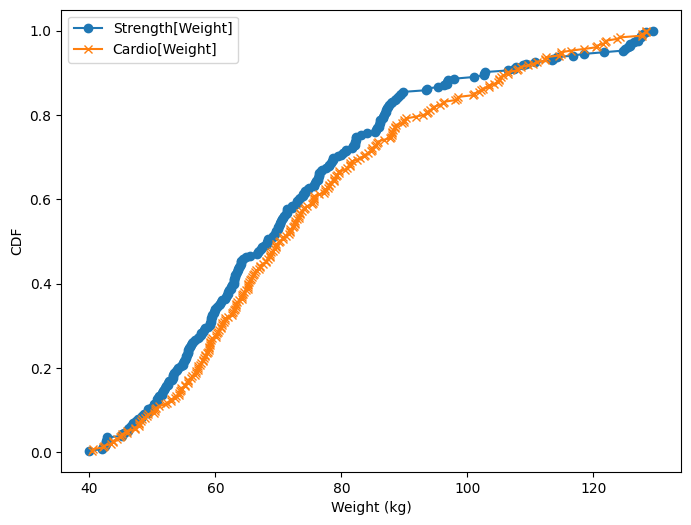

In [27]:
# let's see how would a Q-Q plot of the weight in two different workout types will look like:
strength_weight = df_gym[df_gym['Workout_Type'] == 'Strength']['Weight (kg)']
cardio_weight = df_gym[df_gym['Workout_Type'] == 'Cardio']['Weight (kg)']

# Ensure both series have the same number of data points by taking the smaller length
min_length = min(len(strength_weight), len(cardio_weight))

# Take a random sample from both to make them the same size
strength_weight_sample = strength_weight.sample(min_length, random_state=42)
cardio_weight_sample = cardio_weight.sample(min_length, random_state=42)

# Sort the data for both Strength and Cardio weight
sorted_strength = np.sort(strength_weight_sample)
sorted_cardio = np.sort(cardio_weight_sample)

# Calculate the CDF for both Strength and Cardio
cdf_strength = np.arange(1, len(sorted_strength) + 1) / len(sorted_strength)
cdf_cardio = np.arange(1, len(sorted_cardio) + 1) / len(sorted_cardio)

# Plot the Empirical CDFs for both Strength[Weight] and Cardio[Weight]
plt.figure(figsize=(8, 6))
plt.plot(sorted_strength, cdf_strength, label='Strength[Weight]', marker='o')
plt.plot(sorted_cardio, cdf_cardio, label='Cardio[Weight]', marker='x')

# Set plot labels and title
plt.xlabel('Weight (kg)')
plt.ylabel('CDF')
plt.legend()

When we use Empirical CDF we see that the disterbutions are similar to one another.

In [28]:
# to get concrete resultes we will use the KS test:
strength_weight_sample = strength_weight.sample(min_length, random_state=42)
cardio_weight_sample = cardio_weight.sample(min_length, random_state=42)

# Apply the KS test to compare the two distributions
ks_statistic, ks_pvalue = stats.ks_2samp(strength_weight_sample, cardio_weight_sample)

# Print the KS statistic and p-value
print(f"KS Statistic: {ks_statistic}")
print(f"KS P-value: {ks_pvalue}")

# Interpret the result
if ks_pvalue < 0.05:
    print("The distributions are significantly different (reject H0).")
else:
    print("The distributions are not significantly different (fail to reject H0).")

KS Statistic: 0.09411764705882353
KS P-value: 0.20894602299576795
The distributions are not significantly different (fail to reject H0).


We see from the results that they do act the same.

In [29]:
from scipy.stats import shapiro

# Subset data for each workout type and feature
cardio_calories = df_gym[df_gym['Workout_Type'] == 'Cardio']['Calories_Burned']
yoga_fat_percentage = df_gym[df_gym['Workout_Type'] == 'Yoga']['Fat_Percentage']
strength_weight = df_gym[df_gym['Workout_Type'] == 'Strength']['Weight (kg)']

# Perform Shapiro-Wilk test
shapiro_cardio = shapiro(cardio_calories)
shapiro_yoga = shapiro(yoga_fat_percentage)
shapiro_strength = shapiro(strength_weight)

print("Shapiro-Wilk Test Results:")
print(f"Cardio (Calories Burned): W-stat={shapiro_cardio.statistic:.3f}, p-value={shapiro_cardio.pvalue:.3f}")
print(f"Yoga (Fat Percentage): W-stat={shapiro_yoga.statistic:.3f}, p-value={shapiro_yoga.pvalue:.3f}")
print(f"Strength (Weight): W-stat={shapiro_strength.statistic:.3f}, p-value={shapiro_strength.pvalue:.3f}")

Shapiro-Wilk Test Results:
Cardio (Calories Burned): W-stat=0.989, p-value=0.051
Yoga (Fat Percentage): W-stat=0.959, p-value=0.000
Strength (Weight): W-stat=0.918, p-value=0.000


Looks like they are infact don't distributes normally.

The people in the dataset, as well as the different types of workouts are independent of each other. This is why we will use T-test for independent samples.

In [30]:
# some examples for independent T-test:
from scipy.stats import ttest_ind

# Yoga[Calories_Burned] and HIIT[Calories_Burned]
yoga_calories = df_gym[df_gym['Workout_Type'] == 'Yoga']['Calories_Burned']
hiit_calories = df_gym[df_gym['Workout_Type'] == 'HIIT']['Calories_Burned']
t_stat1, p_val1 = ttest_ind(yoga_calories, hiit_calories, equal_var=False)
print(f"T-test for Yoga vs. HIIT (Calories_Burned): t-stat={t_stat1:.3f}, p-value={p_val1:.3f}")

# Cardio[Fat_Percentage] and Strength[Fat_Percentage]
cardio_fat = df_gym[df_gym['Workout_Type'] == 'Cardio']['Fat_Percentage']
strength_fat = df_gym[df_gym['Workout_Type'] == 'Strength']['Fat_Percentage']
t_stat2, p_val2 = ttest_ind(cardio_fat, strength_fat, equal_var=False)
print(f"T-test for Cardio vs. Strength (Fat_Percentage): t-stat={t_stat2:.3f}, p-value={p_val2:.3f}")

# Yoga[Weight] and Cardio[Weight]
yoga_weight = df_gym[df_gym['Workout_Type'] == 'Yoga']['Weight (kg)']
cardio_weight = df_gym[df_gym['Workout_Type'] == 'Cardio']['Weight (kg)']
t_stat3, p_val3 = ttest_ind(yoga_weight, cardio_weight, equal_var=False)
print(f"T-test for Yoga vs. Cardio (Weight): t-stat={t_stat3:.3f}, p-value={p_val3:.3f}")

# Cardio[Session_Duration (hours)] and HIIT[Session_Duration (hours)]
cardio_duration = df_gym[df_gym['Workout_Type'] == 'Cardio']['Session_Duration (hours)']
hiit_duration = df_gym[df_gym['Workout_Type'] == 'HIIT']['Session_Duration (hours)']
t_stat4, p_val4 = ttest_ind(cardio_duration, hiit_duration, equal_var=False)
print(f"T-test for Cardio vs. HIIT (Session_Duration): t-stat={t_stat4:.3f}, p-value={p_val4:.3f}")

T-test for Yoga vs. HIIT (Calories_Burned): t-stat=-0.880, p-value=0.379
T-test for Cardio vs. Strength (Fat_Percentage): t-stat=-0.114, p-value=0.909
T-test for Yoga vs. Cardio (Weight): t-stat=-0.497, p-value=0.619
T-test for Cardio vs. HIIT (Session_Duration): t-stat=-2.173, p-value=0.030


We have both low t-stat and high p-value, this helps us see what we already saw on the plot, the fact that we don't have segnificant difference in the means.


Now let's try a few dependent T-tests:

In [31]:
from scipy.stats import ttest_rel
# in cardio, we will assume that the resting bpm is different from the max bpm.
# let's check it:
cardio_resting_bpm = df_gym[df_gym['Workout_Type'] == 'Cardio']['Resting_BPM']
cardio_max_bpm = df_gym[df_gym['Workout_Type'] == 'Cardio']['Max_BPM']
t_stat1, p_val1 = ttest_rel(cardio_resting_bpm, cardio_max_bpm)
print(f"Paired T-test for Cardio (Resting_BPM vs. Max_BPM): t-stat={t_stat1:.3f}, p-value={p_val1:.3f}")


# we would also like to test if the bmi and fat percentage are close to one another:
fat_percentage = df_gym['Fat_Percentage']
bmi = df_gym['BMI']
t_stat2, p_val2 = ttest_rel(fat_percentage, bmi)
print(f"Paired T-test for Fat_Percentage vs. BMI: t-stat={t_stat2:.3f}, p-value={p_val2:.3f}")

Paired T-test for Cardio (Resting_BPM vs. Max_BPM): t-stat=-143.783, p-value=0.000
Paired T-test for Fat_Percentage vs. BMI: t-stat=0.209, p-value=0.835


We can see that the first test has a p-value of less than 0.000 therefore we can assume that there is a difference. On the other hand looks like the BMI and Fat_Percentage don't have a segnificant difference, which helps us see that they are similar like we thought.

## Ordinary Least Squares

<Axes: xlabel='Session_Duration (hours)', ylabel='Calories_Burned'>

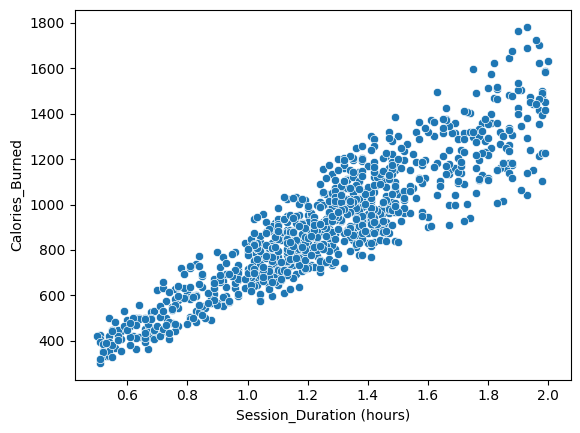

In [32]:
# doing scatter plot for two connected categories:
sns.scatterplot(data=df_gym, x='Session_Duration (hours)', y='Calories_Burned')

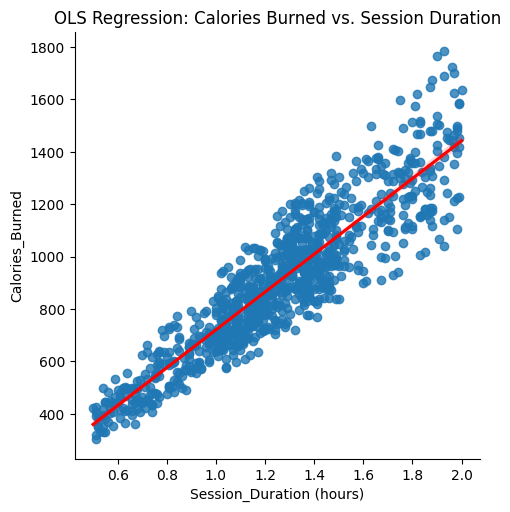

In [33]:
sns.lmplot(data=df_gym, x='Session_Duration (hours)', y='Calories_Burned', ci=95, line_kws={'color': 'red'})
plt.title('OLS Regression: Calories Burned vs. Session Duration')
plt.show()

In [34]:
y = df_gym['Calories_Burned']
X = df_gym['Session_Duration (hours)']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Calories_Burned   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     4569.
Date:                Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:12:28   Log-Likelihood:                -5989.7
No. Observations:                 973   AIC:                         1.198e+04
Df Residuals:                     971   BIC:                         1.199e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

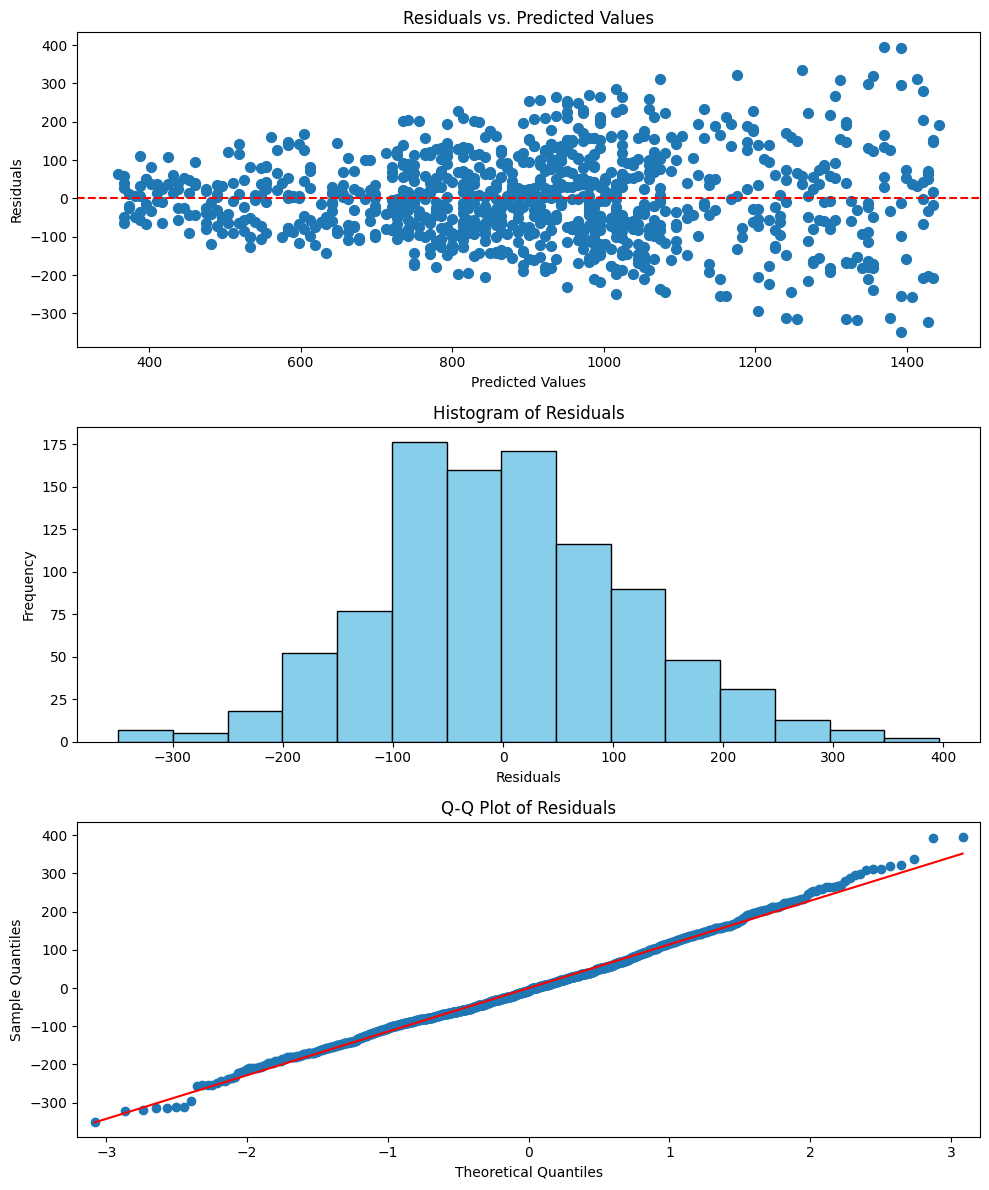

In [35]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Scatter plot of predicted values vs residuals
ax = axes[0]
ax.scatter(model.fittedvalues, model.resid, s=50)
ax.axhline(0, color="red", linestyle="--")
ax.set_title("Residuals vs. Predicted Values")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Residuals")

# Histogram of residuals
ax = axes[1]
ax.hist(model.resid, bins=15, color="skyblue", edgecolor="black")
ax.set_title("Histogram of Residuals")
ax.set_xlabel("Residuals")
ax.set_ylabel("Frequency")

# Q-Q plot of residuals
ax = axes[2]
sm.graphics.qqplot(model.resid, line="s", ax=ax)
ax.set_title("Q-Q Plot of Residuals")

# Adjust layout
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Influence Plot for Calories_Burned vs. Session_Duration (hours)')

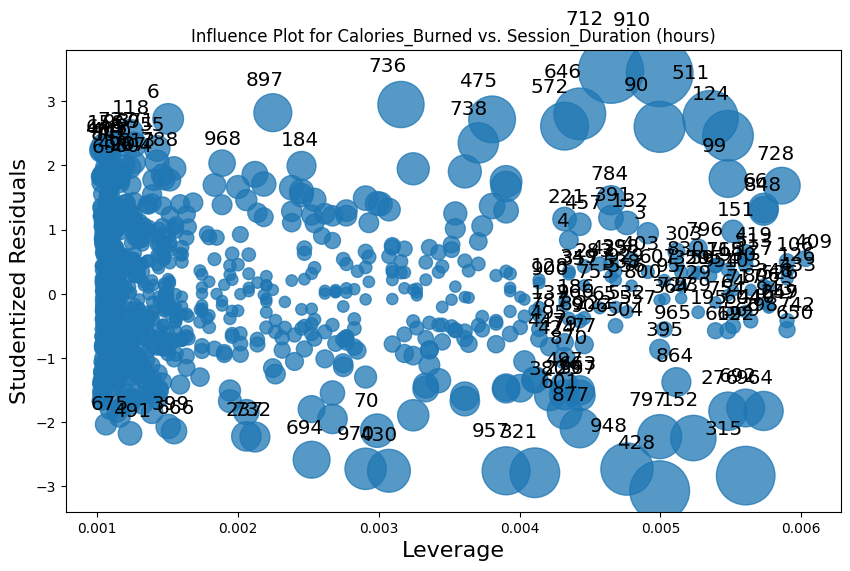

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
model.get_influence().plot_influence(ax=ax)

ax.set_title("Influence Plot for Calories_Burned vs. Session_Duration (hours)")

## Feature engineering

# Fisher Exact

We will use votes from the last election in the US (from polls), divided by men/women and Trump/Harris.

The information is from https://www.theguardian.com/us-news/2024/oct/25/us-presidential-election-trump-harris-updates.

We will try to see if the gender has any effect on the vote.

In [37]:
# building the table:
votes = {
    'Men': [53, 37],
    'Women': [36, 53]
}
row_labels = ['Trump', 'Harris']
column_labels = ['Men', 'Women']
crosstab = pd.DataFrame(votes, index=row_labels, columns=column_labels)

print(crosstab)


        Men  Women
Trump    53     36
Harris   37     53


In [38]:
stats.fisher_exact(crosstab)
## p-value less than 0.05!

SignificanceResult(statistic=2.108858858858859, pvalue=0.016826133982362955)

# Breast Cancer

In [39]:
# uploading the csv
df_cancer = pd.read_csv('/content/drive/MyDrive/data.csv')
df_cancer = df_cancer.drop(columns=['Unnamed: 32'])
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## statistical analysis